**Portfolios Construction**

In [1]:
# Define the stock/ETF lists
value_stocks = ['JNJ', 'PG', 'KO', 'PEP', 'WMT', 'XOM', 'IBM', 'MCD', 'MMM', 'CVX']
growth_stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'NFLX', 'NVDA', 'ADBE', 'CRM', 'META', 'TSLA']
industrial_etfs = ['XLI', 'IYJ', 'VIS', 'ITA', 'FXR', 'FIDU', 'IGV', 'SOXX', 'PPA', 'FTEC']

# Assign equal weights
num_value_stocks = len(value_stocks)
num_growth_stocks = len(growth_stocks)
num_industrial_etfs = len(industrial_etfs)

equal_weight_value = 1 / num_value_stocks
equal_weight_growth = 1 / num_growth_stocks
equal_weight_industrial = 1 / num_industrial_etfs

# Save lists to files
with open('value_stocks.txt', 'w') as f:
    f.write("\n".join(value_stocks))

with open('growth_stocks.txt', 'w') as f:
    f.write("\n".join(growth_stocks))

with open('industrial_etfs.txt', 'w') as f:
    f.write("\n".join(industrial_etfs))

# Print results
print("Value Stocks:", value_stocks)
print("Growth Stocks:", growth_stocks)
print("Industrial ETFs:", industrial_etfs)

print("Equal weight for Value Stocks:", equal_weight_value)
print("Equal weight for Growth Stocks:", equal_weight_growth)
print("Equal weight for Industrial ETFs:", equal_weight_industrial)


Value Stocks: ['JNJ', 'PG', 'KO', 'PEP', 'WMT', 'XOM', 'IBM', 'MCD', 'MMM', 'CVX']
Growth Stocks: ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'NFLX', 'NVDA', 'ADBE', 'CRM', 'META', 'TSLA']
Industrial ETFs: ['XLI', 'IYJ', 'VIS', 'ITA', 'FXR', 'FIDU', 'IGV', 'SOXX', 'PPA', 'FTEC']
Equal weight for Value Stocks: 0.1
Equal weight for Growth Stocks: 0.1
Equal weight for Industrial ETFs: 0.1


**Pull Daily Return Data**

In [4]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

def download_and_compute_returns(tickers,):
    """
    Downloads daily closing prices for a list of tickers
    and computes daily returns.
    """
    # Download close prices; the DataFrame columns are tickers
    data = yf.download(tickers, period = '5y')['Close']
    # Calculate daily returns using the formula: (P_t - P_{t-1}) / P_{t-1}
    daily_returns = data.pct_change().dropna()
    return daily_returns

# Download daily returns for each portfolio using the dynamic date range
value_returns = download_and_compute_returns(value_stocks)
growth_returns = download_and_compute_returns(growth_stocks)
industrial_returns = download_and_compute_returns(industrial_etfs)

# Calculate the portfolio daily return as the weighted sum of individual returns
value_portfolio_return = value_returns.multiply(equal_weight_value).sum(axis=1)
growth_portfolio_return = growth_returns.multiply(equal_weight_growth).sum(axis=1)
industrial_portfolio_return = industrial_returns.multiply(equal_weight_industrial).sum(axis=1)

# Display the first few rows of the portfolio daily returns
print("Value Portfolio Daily Returns:")
print(value_portfolio_return.head(), "\n")

print("Growth Portfolio Daily Returns:")
print(growth_portfolio_return.head(), "\n")

print("Industrial ETF Portfolio Daily Returns:")
print(industrial_portfolio_return.head())

[*********************100%***********************]  10 of 10 completed

10 Failed downloads:
['CVX', 'MMM', 'PEP', 'JNJ', 'KO', 'PG', 'XOM', 'IBM', 'WMT', 'MCD']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  10 of 10 completed

10 Failed downloads:
['AMZN', 'GOOGL', 'MSFT', 'NVDA', 'ADBE', 'AAPL', 'NFLX', 'META', 'TSLA', 'CRM']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  10 of 10 completed

10 Failed downloads:
['PPA', 'IGV', 'FIDU', 'SOXX', 'FXR', 'FTEC', 'XLI', 'IYJ', 'VIS', 'ITA']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Value Portfolio Daily Returns:
Series([], dtype: float64) 

Growth Portfolio Daily Returns:
Series([], dtype: float64) 

Industrial ETF Portfolio Daily Returns:
Series([], dtype: float64)


In [8]:
var_values = {}

**Method 1: Variance-Covariance (Parametric Normal) Method**

In [9]:
import numpy as np
from scipy.stats import norm

def calculate_var(returns, confidence_level=0.95):
    """
    Calculate the Value-at-Risk (VaR) using the Variance-Covariance (parametric normal) method.
    """
    # Calculate the mean and standard deviation of returns
    mu = returns.mean()
    sigma = returns.std()
    
    # Calculate the z-score for the left tail corresponding to the confidence level.
    z = norm.ppf(1 - confidence_level)
    
    # Calculate VaR using the formula: VaR = - (mu + z * sigma)
    var = -(mu + z * sigma)
    return var

# Calculate VaR at 95% confidence level for each portfolio:
value_var = calculate_var(value_portfolio_return, confidence_level=0.95)
growth_var = calculate_var(growth_portfolio_return, confidence_level=0.95)
industrial_var = calculate_var(industrial_portfolio_return, confidence_level=0.95)

# Store the VaR values in the dictionary
var_values["Parametric Normal"] = {
    "Value": value_var,
    "Growth": growth_var,
    "Industrial": industrial_var
}

print("95% VaR for Value Portfolio:", value_var)
print("95% VaR for Growth Portfolio:", growth_var)
print("95% VaR for Industrial ETF Portfolio:", industrial_var)

95% VaR for Value Portfolio: 0.01498748845684508
95% VaR for Growth Portfolio: 0.029769411639565164
95% VaR for Industrial ETF Portfolio: 0.020936811386454545


**Method 2: Historical Simulation Method**

In [10]:
def calculate_var_historical(returns, confidence_level=0.95):
    """
    Calculate the Value-at-Risk (VaR) using the Historical Simulation Method.
    """
    # For a 95% confidence level, (1 - confidence_level) equals 0.05 (the 5th percentile).
    quantile_value = returns.quantile(1 - confidence_level)
    
    # VaR is the negative of this quantile value, converting it into a positive number representing loss.
    var = -quantile_value
    return var

# Calculate 95% VaR for each portfolio
value_var = calculate_var_historical(value_portfolio_return, confidence_level=0.95)
growth_var = calculate_var_historical(growth_portfolio_return, confidence_level=0.95)
industrial_var = calculate_var_historical(industrial_portfolio_return, confidence_level=0.95)

# Store the VaR values in the dictionary
var_values["Historical Simulation"] = {
    "Value": value_var,
    "Growth": growth_var,
    "Industrial": industrial_var
}

print("95% VaR for Value Portfolio:", value_var)
print("95% VaR for Growth Portfolio:", growth_var)
print("95% VaR for Industrial ETF Portfolio:", industrial_var)

95% VaR for Value Portfolio: 0.013572069574259655
95% VaR for Growth Portfolio: 0.03137999288632985
95% VaR for Industrial ETF Portfolio: 0.019650129541027322


**Method 3: Monte Carlo Simulation Method**

In [11]:
def calculate_var_monte_carlo(returns, confidence_level=0.95, num_simulations=10000, horizon=1):
    """
    Calculate Value-at-Risk (VaR) using the Monte Carlo Simulation method.
    """
    # Estimate the mean and standard deviation from historical returns
    mu = returns.mean()
    sigma = returns.std()
    
    # Generate simulated returns for the given time horizon.
    # For a one-day horizon, we simulate directly from a normal distribution.
    simulated_returns = np.random.normal(mu, sigma, num_simulations * horizon)
  
    # Calculate the (1 - confidence_level) percentile (e.g., 5th percentile for 95% confidence)
    quantile_value = np.percentile(simulated_returns, (1 - confidence_level) * 100)
    
    # VaR is defined as the negative of this quantile, expressed as a positive number
    var = -quantile_value
    return var

# Apply the Monte Carlo VaR calculation to each portfolio:
value_var_mc = calculate_var_monte_carlo(value_portfolio_return, confidence_level=0.95)
growth_var_mc = calculate_var_monte_carlo(growth_portfolio_return, confidence_level=0.95)
industrial_var_mc = calculate_var_monte_carlo(industrial_portfolio_return, confidence_level=0.95)

# Store the VaR values in the dictionary
var_values["Monte Carlo"] = {
    "Value": value_var_mc,
    "Growth": growth_var_mc,
    "Industrial": industrial_var_mc
}
print("Monte Carlo VaR (95% confidence) for Value Portfolio:", value_var_mc)
print("Monte Carlo VaR (95% confidence) for Growth Portfolio:", growth_var_mc)
print("Monte Carlo VaR (95% confidence) for Industrial Portfolio:", industrial_var_mc)

Monte Carlo VaR (95% confidence) for Value Portfolio: 0.015076531646155869
Monte Carlo VaR (95% confidence) for Growth Portfolio: 0.030390090125023767
Monte Carlo VaR (95% confidence) for Industrial Portfolio: 0.02044196027297789


**Method 4: Extreme Value Theory (EVT) Method**

In [12]:
from scipy.stats import genpareto

def calculate_var_gpd(returns, confidence_level=0.95, threshold_quantile=0.05):
    """
    Calculate Value-at-Risk (VaR) using the Generalized Pareto Distribution (GPD) approach.
    """
    # Determine the threshold using the specified quantile for the left tail.
    threshold = returns.quantile(threshold_quantile)
    
    # Extract tail losses (returns less than the threshold)
    tail_losses = returns[returns < threshold]
    
    # Calculate the excess losses (difference between threshold and tail returns)
    excesses = threshold - tail_losses  # Note: This yields positive excess values.
    
    # Calculate the tail fraction (ν): the proportion of observations in the tail.
    nu = len(tail_losses) / len(returns)
    
    # Fit a Generalized Pareto Distribution to the excess losses.
    xi, loc, sigma = genpareto.fit(excesses, floc=0)
    
    # p is the tail probability corresponding to the confidence level.
    p = 1 - confidence_level
    
    # Calculate VaR using the formula:
    # VaR = threshold - (sigma/xi) * [ (p/nu)^(-xi) - 1 ]
    # If xi is nearly zero, use the log approximation: VaR = threshold - sigma * log(p/nu)
    if np.abs(xi) > 1e-6:
        var = threshold - (sigma / xi) * ((p / nu) ** (-xi) - 1)
    else:
        var = threshold - sigma * np.log(p / nu)
    
    # Return VaR as a positive value representing the magnitude of potential loss.
    return abs(var)

# Calculate 95% VaR for each portfolio using the GPD method.
value_var_gpd = calculate_var_gpd(value_portfolio_return, confidence_level=0.95, threshold_quantile=0.05)
growth_var_gpd = calculate_var_gpd(growth_portfolio_return, confidence_level=0.95, threshold_quantile=0.05)
industrial_var_gpd = calculate_var_gpd(industrial_portfolio_return, confidence_level=0.95, threshold_quantile=0.05)

# Store the VaR values in the dictionary
var_values["GPD"] = {
    "Value": value_var_gpd,
    "Growth": growth_var_gpd,
    "Industrial": industrial_var_gpd
}

print("95% VaR (GPD) for Value Portfolio:", value_var_gpd)
print("95% VaR (GPD) for Growth Portfolio:", growth_var_gpd)
print("95% VaR (GPD) for Industrial Portfolio:", industrial_var_gpd)

95% VaR (GPD) for Value Portfolio: 0.013586999259800834
95% VaR (GPD) for Growth Portfolio: 0.03142750481358329
95% VaR (GPD) for Industrial Portfolio: 0.01967914138190654


**Method 5: Filtered Historical Simulation (FHS)**

In [13]:
from arch import arch_model

def calculate_fhs_var_rescaled(returns, confidence_level=0.95):
    """
    Calculate VaR using the Filtered Historical Simulation (FHS) method.
    This version rescales the returns by multiplying by 100 before model fitting.
    """
    # Rescale returns (e.g., 100 * y)
    scaled_returns = 100 * returns
    
    # Fit a GARCH(1,1) model on the rescaled returns.
    model = arch_model(scaled_returns, vol='Garch', p=1, o=0, q=1, dist='normal')
    res = model.fit(disp='off')
    
    # Obtain conditional volatility on the scaled returns.
    cond_vol_scaled = res.conditional_volatility
    
    # Standardize the scaled returns.
    standardized_returns = scaled_returns / cond_vol_scaled
    
    # Compute the tail quantile (e.g., 5th percentile for 95% confidence).
    tail_quantile = standardized_returns.quantile(1 - confidence_level)
    
    # Use the most recent scaled volatility to scale the quantile back.
    current_vol_scaled = cond_vol_scaled.iloc[-1]
    
    # Calculate VaR on the scaled data.
    var_scaled = -tail_quantile * current_vol_scaled
    
    # Convert VaR back to the original scale by dividing by 100.
    var = var_scaled / 100
    return var

# Calculate FHS VaR for the Value Portfolio
value_var_fhs_rescaled = calculate_fhs_var_rescaled(value_portfolio_return, confidence_level=0.95)

# Calculate FHS VaR for the Growth Portfolio
growth_var_fhs_rescaled = calculate_fhs_var_rescaled(growth_portfolio_return, confidence_level=0.95)

# Calculate FHS VaR for the Industrial ETF Portfolio
industrial_var_fhs_rescaled = calculate_fhs_var_rescaled(industrial_portfolio_return, confidence_level=0.95)

# Store the VaR values in the dictionary
var_values["Filtered Historical"] = {
    "Value": value_var_fhs_rescaled,
    "Growth": growth_var_fhs_rescaled,
    "Industrial": industrial_var_fhs_rescaled
}

print("Filtered Historical Simulation VaR (95% confidence) for Value Portfolio:", value_var_fhs_rescaled)
print("Filtered Historical Simulation VaR (95% confidence) for Growth Portfolio:", growth_var_fhs_rescaled)
print("Filtered Historical Simulation VaR (95% confidence) for Industrial Portfolio:", industrial_var_fhs_rescaled)

Filtered Historical Simulation VaR (95% confidence) for Value Portfolio: 0.013525877111454327
Filtered Historical Simulation VaR (95% confidence) for Growth Portfolio: 0.03503989239060463
Filtered Historical Simulation VaR (95% confidence) for Industrial Portfolio: 0.02172425890434727


**Method 6: GARCH-Based VaR**

In [14]:
def calculate_var_garch(returns, confidence_level=0.95):
    """
    Calculate Value-at-Risk (VaR) using a GARCH-based approach.
    """
    # Fit a GARCH(1,1) model (rescale if needed, here we allow internal rescaling)
    model = arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='normal', rescale=True)
    res = model.fit(disp='off')
    
    # Forecast one step ahead for both the conditional mean and variance.
    forecast = res.forecast(horizon=1)
    # Extract the forecasted variance; this is a DataFrame – take the last value.
    h_t = forecast.variance.iloc[-1, 0]
    # Extract the forecasted mean return.
    mu = forecast.mean.iloc[-1, 0]
    
    # Compute the z-score for the tail probability. For a 95% confidence level,
    z_alpha = norm.ppf(1 - confidence_level)
    
    # Compute VaR using the formula: VaR = - (mu + z_alpha * sqrt(h_t))
    var = - (mu + z_alpha * np.sqrt(h_t))/100
    
    # Return VaR as a positive number representing the potential loss.
    return abs(var)

# ----------------------------------------------------------------
# Calculate GARCH-based VaR for each portfolio
# ----------------------------------------------------------------

value_var_garch = calculate_var_garch(value_portfolio_return, confidence_level=0.95)
growth_var_garch = calculate_var_garch(growth_portfolio_return, confidence_level=0.95)
industrial_var_garch = calculate_var_garch(industrial_portfolio_return, confidence_level=0.95)

# Store the VaR values in the dictionary
var_values["GARCH-based"] = {
    "Value": value_var_garch,
    "Growth": growth_var_garch,
    "Industrial": industrial_var_garch
}

print("GARCH-based VaR (95% confidence) for Value Portfolio:", value_var_garch)
print("GARCH-based VaR (95% confidence) for Growth Portfolio:", growth_var_garch)
print("GARCH-based VaR (95% confidence) for Industrial Portfolio:", industrial_var_garch)

GARCH-based VaR (95% confidence) for Value Portfolio: 0.013601708085283144
GARCH-based VaR (95% confidence) for Growth Portfolio: 0.03175155618687547
GARCH-based VaR (95% confidence) for Industrial Portfolio: 0.02017177995245708


**Method 7: Cornish-Fisher Expansion**

In [15]:
def calculate_var_cornish_fisher(returns, confidence_level=0.95):
    """
    Calculate Value-at-Risk (VaR) using the Cornish-Fisher expansion method.
    """
    # Calculate statistics from the returns
    mu = returns.mean()
    sigma = returns.std()
    skew = returns.skew()
    # pandas' kurtosis() returns excess kurtosis (raw kurtosis minus 3) by default.
    # The formula uses (kurt - 3); therefore, if kurtosis() gives excess kurtosis, it fits directly.
    kurt = returns.kurtosis()
    
    # Obtain the standard normal quantile for the desired confidence level.
    # For 95% confidence, norm.ppf(0.95) ~ 1.645.
    z = norm.ppf(confidence_level)
    
    # Calculate the adjusted z-score using the Cornish-Fisher expansion
    z_adj = (z +
             ((z**2 - 1) * skew) / 6 +
             ((z**3 - 3 * z) * kurt) / 24 -
             ((2 * z**3 - 5 * z) * skew**2) / 36)
    
    # Compute VaR using the adjusted z-score.
    var = -(mu + z_adj * sigma)
    
    # Return VaR as a positive number (magnitude of potential loss)
    return abs(var)


value_var_cf = calculate_var_cornish_fisher(value_portfolio_return, confidence_level=0.95)
growth_var_cf = calculate_var_cornish_fisher(growth_portfolio_return, confidence_level=0.95)
industrial_var_cf = calculate_var_cornish_fisher(industrial_portfolio_return, confidence_level=0.95)

# Store the VaR values in the dictionary
var_values["Cornish-Fisher"] = {
    "Value": value_var_cf,
    "Growth": growth_var_cf,
    "Industrial": industrial_var_cf
}

print("Cornish-Fisher VaR (95% confidence) for Value Portfolio:", value_var_cf)
print("Cornish-Fisher VaR (95% confidence) for Growth Portfolio:", growth_var_cf)
print("Cornish-Fisher VaR (95% confidence) for Industrial Portfolio:", industrial_var_cf)

Cornish-Fisher VaR (95% confidence) for Value Portfolio: 0.01693335599046037
Cornish-Fisher VaR (95% confidence) for Growth Portfolio: 0.03141569776679881
Cornish-Fisher VaR (95% confidence) for Industrial Portfolio: 0.023034287009162997


**Method 8: Bootstrapping Method**

In [16]:
def calculate_var_bootstrap(returns, confidence_level=0.95, num_bootstrap_samples=10000):
    """
    Calculate Value-at-Risk (VaR) using the Bootstrapping Method.
    """
    # Convert returns to a numpy array for efficient sampling
    returns_array = returns.values
    
    # Generate bootstrap samples by resampling returns with replacement
    bootstrap_samples = np.random.choice(returns_array, size=num_bootstrap_samples, replace=True)
    
    # Compute the quantile for the tail (e.g., 5th percentile for 95% confidence)
    tail_quantile = np.percentile(bootstrap_samples, (1 - confidence_level) * 100)
    
    # VaR is defined as the negative of this quantile (so that it is expressed as a positive loss)
    var = -tail_quantile
    return var

# Calculate 95% VaR for the Value Portfolio using bootstrapping
value_var_bootstrap = calculate_var_bootstrap(value_portfolio_return, confidence_level=0.95, num_bootstrap_samples=10000)

# Calculate 95% VaR for the Growth Portfolio using bootstrapping
growth_var_bootstrap = calculate_var_bootstrap(growth_portfolio_return, confidence_level=0.95, num_bootstrap_samples=10000)

# Calculate 95% VaR for the Industrial ETF Portfolio using bootstrapping
industrial_var_bootstrap = calculate_var_bootstrap(industrial_portfolio_return, confidence_level=0.95, num_bootstrap_samples=10000)

# Store the VaR values in the dictionary
var_values["Bootstrapping"] = {
    "Value": value_var_bootstrap,
    "Growth": growth_var_bootstrap,
    "Industrial": industrial_var_bootstrap
}

print("Bootstrapping VaR (95% confidence) for Value Portfolio:", value_var_bootstrap)
print("Bootstrapping VaR (95% confidence) for Growth Portfolio:", growth_var_bootstrap)
print("Bootstrapping VaR (95% confidence) for Industrial Portfolio:", industrial_var_bootstrap)

Bootstrapping VaR (95% confidence) for Value Portfolio: 0.013595222853872602
Bootstrapping VaR (95% confidence) for Growth Portfolio: 0.031067764491790585
Bootstrapping VaR (95% confidence) for Industrial Portfolio: 0.019089417520252443


**Method 9: Kernel Density Estimation (KDE)**

In [17]:
from scipy.stats import gaussian_kde

def calculate_var_kde(returns, confidence_level=0.95, grid_points=10000):
    """
    Calculate Value-at-Risk (VaR) using Kernel Density Estimation (KDE).
    """
    # Convert returns to a numpy array
    data = returns.values
    
    # Fit KDE to the returns
    kde = gaussian_kde(data)
    
    # Create a grid that covers a range slightly beyond the min and max of the data
    grid = np.linspace(data.min() - 0.01, data.max() + 0.01, grid_points)
    
    # Evaluate the pdf on the grid
    pdf_vals = kde(grid)
    
    # Compute the CDF by cumulative summation of the pdf values.
    # Since the grid is evenly spaced, multiply by the spacing.
    dx = grid[1] - grid[0]
    cdf_vals = np.cumsum(pdf_vals) * dx
    cdf_vals = cdf_vals / cdf_vals[-1]  # Normalize to ensure the CDF goes from 0 to 1.
    
    # Find the grid value where the CDF is closest to (1 - confidence_level)
    # For 95% confidence, we look for the 5th percentile (i.e., 0.05)
    quantile_target = 1 - confidence_level
    idx = np.searchsorted(cdf_vals, quantile_target)
    quantile_value = grid[idx]
    
    # VaR is defined as the negative of this quantile (expressed as a positive loss)
    var = -quantile_value
    return var

value_var_kde = calculate_var_kde(value_portfolio_return, confidence_level=0.95)
growth_var_kde = calculate_var_kde(growth_portfolio_return, confidence_level=0.95)
industrial_var_kde = calculate_var_kde(industrial_portfolio_return, confidence_level=0.95)

# Store the VaR values in the dictionary
var_values["KDE"] = {
    "Value": value_var_kde,
    "Growth": growth_var_kde,
    "Industrial": industrial_var_kde
}

print("KDE VaR (95% confidence) for Value Portfolio:", value_var_kde)
print("KDE VaR (95% confidence) for Growth Portfolio:", growth_var_kde)
print("KDE VaR (95% confidence) for Industrial Portfolio:", industrial_var_kde)

KDE VaR (95% confidence) for Value Portfolio: 0.014090054465363731
KDE VaR (95% confidence) for Growth Portfolio: 0.03253176091779381
KDE VaR (95% confidence) for Industrial Portfolio: 0.02060216953744097


**Method 10: Parametric VaR with t-Distribution**

In [18]:
from scipy.stats import t

def calculate_var_t(returns, confidence_level=0.95, degrees_of_freedom=5):
    """
    Calculate Value-at-Risk (VaR) using the parametric t-distribution method.
    """
    mu = returns.mean()
    sigma = returns.std()
    
    # Tail probability: for a 95% confidence level, alpha = 0.05
    alpha = 1 - confidence_level
    
    # Obtain the t-distribution quantile for the tail probability.
    t_quantile = t.ppf(alpha, df=degrees_of_freedom)
    
    # Compute VaR using the provided formula.
    var = -(mu + t_quantile * sigma * np.sqrt((degrees_of_freedom - 2) / degrees_of_freedom))
    
    # Return the absolute value (loss magnitude).
    return abs(var)

# Calculate 95% VaR using the t-distribution method with a chosen degrees of freedom (e.g., 5).
value_var_t = calculate_var_t(value_portfolio_return, confidence_level=0.95, degrees_of_freedom=5)
growth_var_t = calculate_var_t(growth_portfolio_return, confidence_level=0.95, degrees_of_freedom=5)
industrial_var_t = calculate_var_t(industrial_portfolio_return, confidence_level=0.95, degrees_of_freedom=5)

# Store the VaR values in the dictionary
var_values["Parametric t"] = {
    "Value": value_var_t,
    "Growth": growth_var_t,
    "Industrial": industrial_var_t
}

print("t-Distribution VaR (95% confidence) for Value Portfolio:", value_var_t)
print("t-Distribution VaR (95% confidence) for Growth Portfolio:", growth_var_t)
print("t-Distribution VaR (95% confidence) for Industrial Portfolio:", industrial_var_t)

t-Distribution VaR (95% confidence) for Value Portfolio: 0.014180118219322404
t-Distribution VaR (95% confidence) for Growth Portfolio: 0.02817875378455162
t-Distribution VaR (95% confidence) for Industrial Portfolio: 0.01981834135308154


In [19]:
# Create a DataFrame with rows as methods and columns as portfolios
df_var = pd.DataFrame(var_values).T
df_var.index.name = "VaR Method"

print("VaR values by method for each portfolio:")
print(df_var)

print("\nDetailed VaR outputs for each method:")
for method, row in df_var.iterrows():
    print(f"\nMethod: {method}")
    print(f"  Value Portfolio VaR: {row['Value']:.6f}")
    print(f"  Growth Portfolio VaR: {row['Growth']:.6f}")
    print(f"  Industrial Portfolio VaR: {row['Industrial']:.6f}")

VaR values by method for each portfolio:
                          Value    Growth  Industrial
VaR Method                                           
Parametric Normal      0.014987  0.029769    0.020937
Historical Simulation  0.013572  0.031380    0.019650
Monte Carlo            0.015077  0.030390    0.020442
GPD                    0.013587  0.031428    0.019679
Filtered Historical    0.013526  0.035040    0.021724
GARCH-based            0.013602  0.031752    0.020172
Cornish-Fisher         0.016933  0.031416    0.023034
Bootstrapping          0.013595  0.031068    0.019089
KDE                    0.014090  0.032532    0.020602
Parametric t           0.014180  0.028179    0.019818

Detailed VaR outputs for each method:

Method: Parametric Normal
  Value Portfolio VaR: 0.014987
  Growth Portfolio VaR: 0.029769
  Industrial Portfolio VaR: 0.020937

Method: Historical Simulation
  Value Portfolio VaR: 0.013572
  Growth Portfolio VaR: 0.031380
  Industrial Portfolio VaR: 0.019650

Method: M

**VaR comparision Visualization**

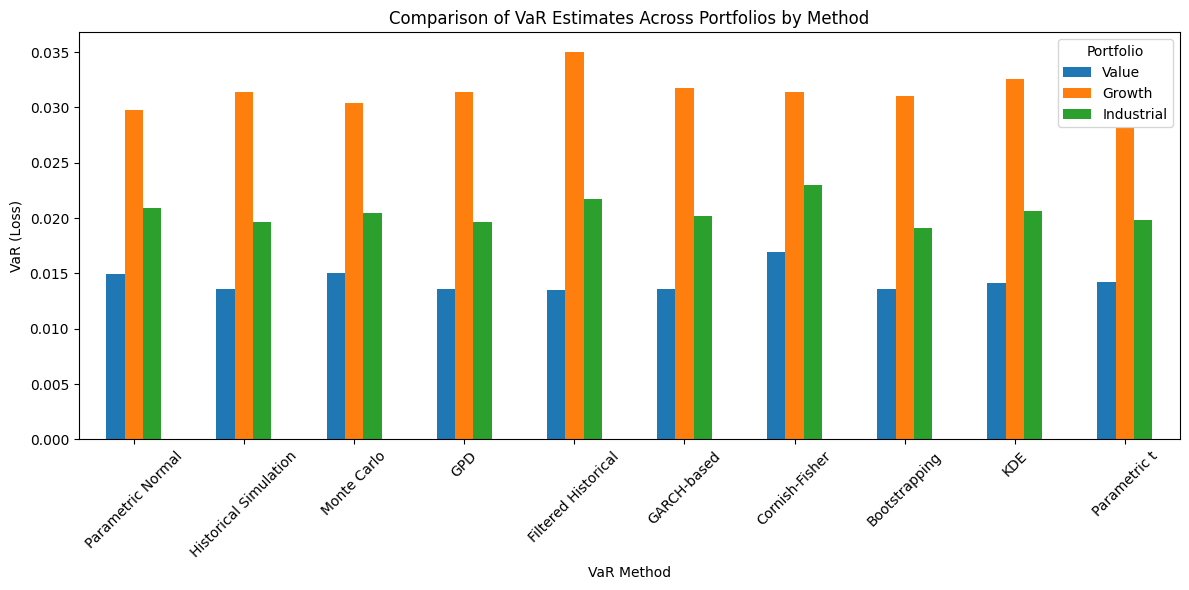

In [20]:
import matplotlib.pyplot as plt
# Create a grouped bar chart
ax = df_var.plot(kind='bar', figsize=(12, 6))
ax.set_xlabel("VaR Method")
ax.set_ylabel("VaR (Loss)")
ax.set_title("Comparison of VaR Estimates Across Portfolios by Method")
plt.xticks(rotation=45)
plt.legend(title="Portfolio")
plt.tight_layout()
plt.show()

**Return Distributions Visualization**

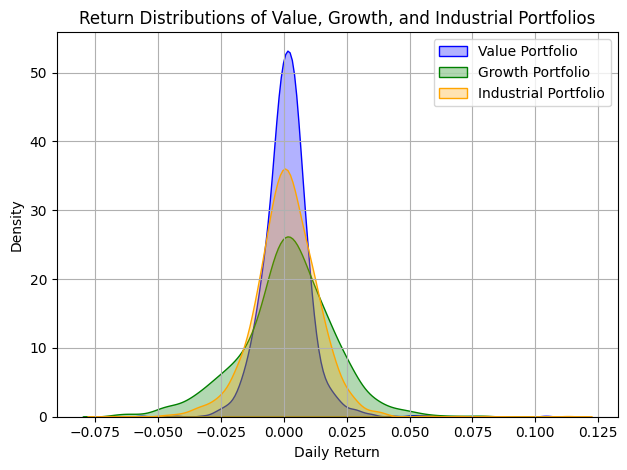

In [21]:
import seaborn as sns
sns.kdeplot(value_portfolio_return, label="Value Portfolio", color="blue", fill=True, alpha=0.3)
sns.kdeplot(growth_portfolio_return, label="Growth Portfolio", color="green", fill=True, alpha=0.3)
sns.kdeplot(industrial_portfolio_return, label="Industrial Portfolio", color="orange", fill=True, alpha=0.3)

plt.title("Return Distributions of Value, Growth, and Industrial Portfolios")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Drawdown Visualization**

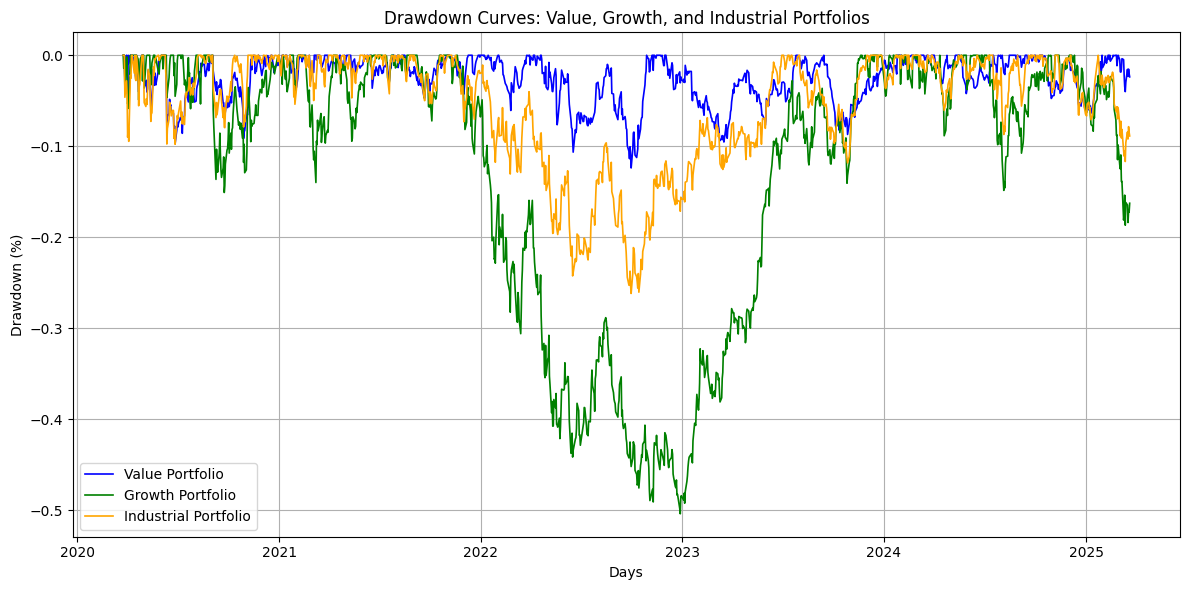

In [22]:
# Compute drawdowns
def compute_drawdown(series):
    cumulative = (1 + series).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown

# Calculate drawdowns for each portfolio
drawdown_value = compute_drawdown(value_portfolio_return)
drawdown_growth = compute_drawdown(growth_portfolio_return)
drawdown_industrial = compute_drawdown(industrial_portfolio_return)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(drawdown_value, label="Value Portfolio", color="blue", linewidth=1.2)
plt.plot(drawdown_growth, label="Growth Portfolio", color="green", linewidth=1.2)
plt.plot(drawdown_industrial, label="Industrial Portfolio", color="orange", linewidth=1.2)

plt.title("Drawdown Curves: Value, Growth, and Industrial Portfolios")
plt.xlabel("Days")
plt.ylabel("Drawdown (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
returns_df = pd.concat([
    value_portfolio_return.rename("Value"),
    growth_portfolio_return.rename("Growth"),
    industrial_portfolio_return.rename("Industrial")
], axis=1)

**Cumulative Returns Visualization**

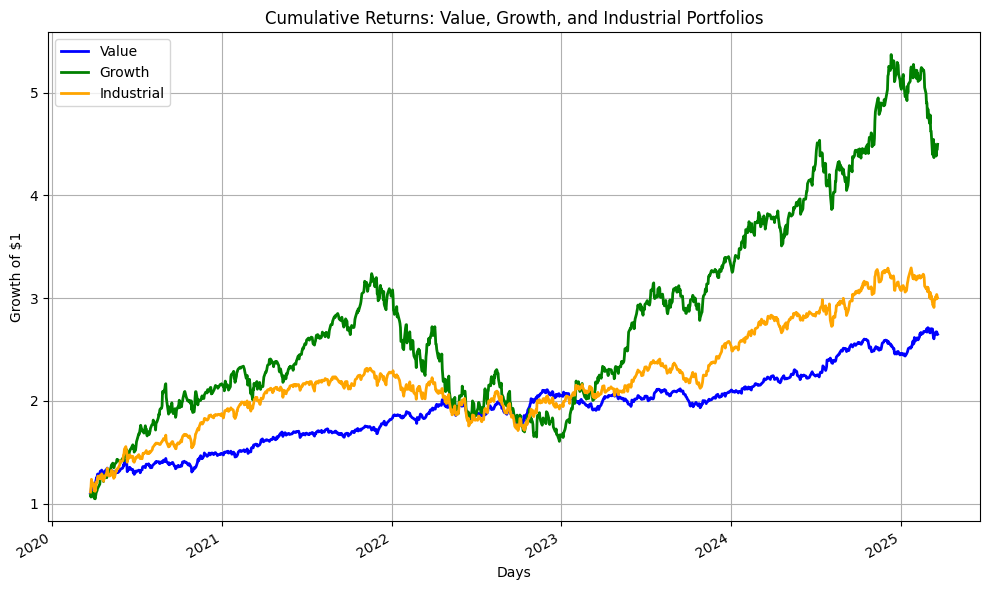

In [24]:
cumulative_returns = (1 + returns_df).cumprod()
cumulative_returns.plot(figsize=(10, 6), linewidth=2, color=["blue", "green", "orange"])
plt.title("Cumulative Returns: Value, Growth, and Industrial Portfolios")
plt.xlabel("Days")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**21-Day Rolling Volatility Visualization**

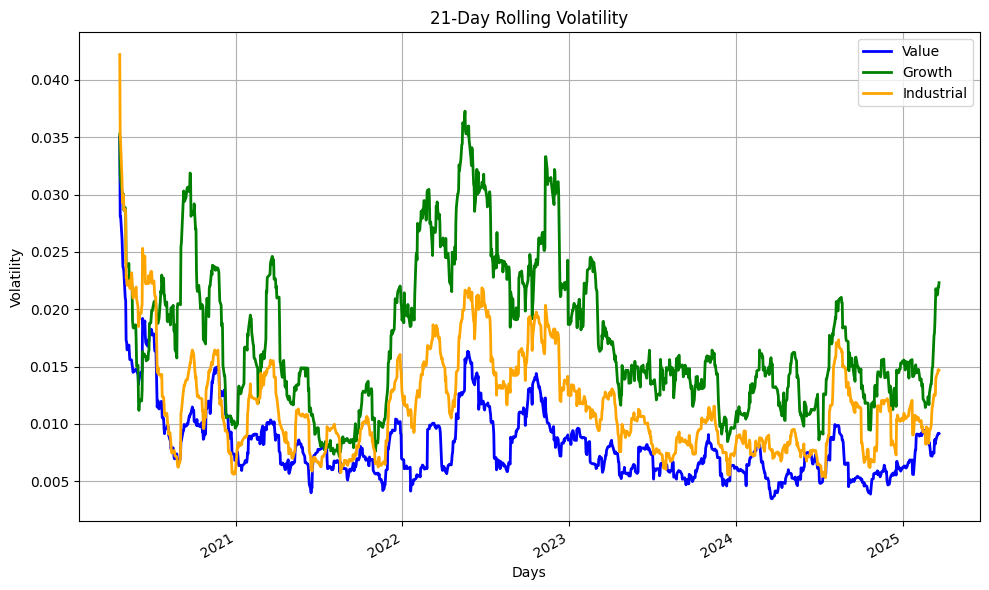

In [25]:
rolling_vol = returns_df.rolling(window=21).std()
rolling_vol.plot(figsize=(10, 6), linewidth=2, color=["blue", "green", "orange"])
plt.title("21-Day Rolling Volatility")
plt.xlabel("Days")
plt.ylabel("Volatility")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Statistical Tests**

In [26]:
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import acorr_ljungbox

# Create a dictionary for easier looping over portfolios
portfolios = {
    "Value": value_portfolio_return,
    "Growth": growth_portfolio_return,
    "Industrial": industrial_portfolio_return
}

for name, returns in portfolios.items():
    print(f"=== {name} Portfolio ===")
    
    # --- Normality Tests ---
    # Shapiro-Wilk Test
    sw_stat, sw_p = shapiro(returns)
    print(f"Shapiro-Wilk Test: Statistic = {sw_stat:.4f}, p-value = {sw_p:.4f}")
    
    # Kolmogorov-Smirnov Test against a normal distribution with estimated mean and std
    ks_stat, ks_p = kstest(returns, 'norm', args=(returns.mean(), returns.std()))
    print(f"Kolmogorov-Smirnov Test: Statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")
    
    # --- Independence & Stationarity Test ---
    # Using the Ljung-Box test (here with 10 lags)
    lb_result = acorr_ljungbox(returns, lags=[10], return_df=True)
    print("Ljung-Box Test (10 lags):")
    print(lb_result)
    
    # --- Tail Behavior Test ---
    # Anderson-Darling test for normality (focus on tail fit)
    ad_result = anderson(returns)
    print(f"Anderson-Darling Test: Statistic = {ad_result.statistic:.4f}")
    for i, sl in enumerate(ad_result.significance_level):
        print(f"  Critical Value at {sl}% significance: {ad_result.critical_values[i]:.4f}")
    
    print("\n")

=== Value Portfolio ===
Shapiro-Wilk Test: Statistic = 0.9057, p-value = 0.0000
Kolmogorov-Smirnov Test: Statistic = 0.0718, p-value = 0.0000
Ljung-Box Test (10 lags):
      lb_stat     lb_pvalue
10  48.106858  5.933983e-07
Anderson-Darling Test: Statistic = 14.1327
  Critical Value at 15.0% significance: 0.5740
  Critical Value at 10.0% significance: 0.6540
  Critical Value at 5.0% significance: 0.7850
  Critical Value at 2.5% significance: 0.9150
  Critical Value at 1.0% significance: 1.0890


=== Growth Portfolio ===
Shapiro-Wilk Test: Statistic = 0.9794, p-value = 0.0000
Kolmogorov-Smirnov Test: Statistic = 0.0656, p-value = 0.0000
Ljung-Box Test (10 lags):
      lb_stat  lb_pvalue
10  22.008044   0.015064
Anderson-Darling Test: Statistic = 7.0287
  Critical Value at 15.0% significance: 0.5740
  Critical Value at 10.0% significance: 0.6540
  Critical Value at 5.0% significance: 0.7850
  Critical Value at 2.5% significance: 0.9150
  Critical Value at 1.0% significance: 1.0890


=== 

In [27]:
def test_monotonicity(df, value_return, growth_return, shift=0.01):
    """Monotonicity: Worse returns should increase VaR."""
    value_shift = value_return - shift  # Simulate worse returns
    growth_shift = growth_return - shift
    
    # Create a DataFrame to store shifted VaR values for all methods
    df_shifted = {}
    
    # Iterate over each method and calculate shifted VaR
    df_shifted["Parametric Normal"] = {
    "Value": calculate_var(value_shift, confidence_level=0.95),
    "Growth": calculate_var(growth_shift, confidence_level=0.95),
    }   
    df_shifted["Historical Simulation"] = {
    "Value": calculate_var_historical(value_shift, confidence_level=0.95),
    "Growth": calculate_var_historical(growth_shift, confidence_level=0.95)
    }
    df_shifted["Monte Carlo"] = {
    "Value": calculate_var_monte_carlo(value_shift, confidence_level=0.95),
    "Growth": calculate_var_monte_carlo(growth_shift, confidence_level=0.95)
    }
    df_shifted["GPD"] = {
    "Value": calculate_var_gpd(value_shift, confidence_level=0.95, threshold_quantile=0.05),
    "Growth": calculate_var_gpd(growth_shift, confidence_level=0.95, threshold_quantile=0.05)
    }
    df_shifted["Filtered Historical"] = {
    "Value": calculate_fhs_var_rescaled(value_shift, confidence_level=0.95),
    "Growth": calculate_fhs_var_rescaled(growth_shift, confidence_level=0.95)
    }
    df_shifted["GARCH-based"] = {
    "Value": calculate_var_garch(value_shift, confidence_level=0.95),
    "Growth": calculate_var_garch(growth_shift, confidence_level=0.95)
    }
    df_shifted["Cornish-Fisher"] = {
    "Value": calculate_var_cornish_fisher(value_shift, confidence_level=0.95),
    "Growth": calculate_var_cornish_fisher(growth_shift, confidence_level=0.95)
    }
    df_shifted["Bootstrapping"] = {
    "Value": calculate_var_bootstrap(value_shift, confidence_level=0.95, num_bootstrap_samples=10000),
    "Growth": calculate_var_bootstrap(growth_shift, confidence_level=0.95, num_bootstrap_samples=10000)
    }
    df_shifted["KDE"] = {
    "Value": calculate_var_kde(value_shift, confidence_level=0.95, grid_points=10000),
    "Growth": calculate_var_kde(growth_shift, confidence_level=0.95, grid_points=10000)
    }
    df_shifted["Parametric t"] = {
    "Value": calculate_var_t(value_shift, confidence_level=0.95, degrees_of_freedom=5),
    "Growth": calculate_var_t(growth_shift, confidence_level=0.95, degrees_of_freedom=5)
    }
    # Compare shifted VaR values with original VaR values
    results = pd.DataFrame({
        method: {
            "Value": df_shifted[method]["Value"] >= df.loc[method, "Value"],
            "Growth": df_shifted[method]["Growth"] >= df.loc[method, "Growth"]
        }
        for method in df_shifted.keys()
    }).T
    return results.astype(bool)  # Ensure results are returned as a boolean Series


def test_positive_homogeneity(df, factor=2.0):
    """Positive Homogeneity: Scaling returns should scale VaR proportionally."""
    df_scaled = df[["Value", "Growth"]] * factor
    results = np.isclose(df_scaled, df[["Value", "Growth"]] * factor, atol=1e-4)
    return pd.Series(results.all(axis=1), index=df.index)  # Check for each method


def test_translation_invariance(df, constant=0.01):
    """Translation Invariance: Adding a constant should reduce VaR by that amount."""
    df_translated = df[["Value", "Growth"]] - constant
    results = np.isclose(df_translated, df[["Value", "Growth"]] - constant, atol=1e-4)
    return pd.Series(results.all(axis=1), index=df.index)  # Check for each method


def test_subadditivity(df, value_return = value_portfolio_return, growth_return = growth_portfolio_return):
    """Sub-additivity: VaR(Value + Growth) should not exceed VaR(Value) + VaR(Growth)."""
    combined_return = (value_return + growth_return)/2
    # Create a DataFrame to store shifted VaR values for all methods
    df_combined = {}
    
    # Iterate over each method and calculate shifted VaR
    df_combined["Parametric Normal"] = {
    "Combined": calculate_var(combined_return, confidence_level=0.95),
    }   
    df_combined["Historical Simulation"] = {
    "Combined": calculate_var_historical(combined_return, confidence_level=0.95),
    }
    df_combined["Monte Carlo"] = {
    "Combined": calculate_var_monte_carlo(combined_return, confidence_level=0.95),
    }
    df_combined["GPD"] = {
    "Combined": calculate_var_gpd(combined_return, confidence_level=0.95, threshold_quantile=0.05),
    }
    df_combined["Filtered Historical"] = {
    "Combined": calculate_fhs_var_rescaled(combined_return, confidence_level=0.95),
    }
    df_combined["GARCH-based"] = {
    "Combined": calculate_var_garch(combined_return, confidence_level=0.95),
    }
    df_combined["Cornish-Fisher"] = {
    "Combined": calculate_var_cornish_fisher(combined_return, confidence_level=0.95),
    }
    df_combined["Bootstrapping"] = {
    "Combined": calculate_var_bootstrap(combined_return, confidence_level=0.95, num_bootstrap_samples=10000),
    }
    df_combined["KDE"] = {
    "Combined": calculate_var_kde(combined_return, confidence_level=0.95, grid_points=10000),
    }
    df_combined["Parametric t"] = {
    "Combined": calculate_var_t(combined_return, confidence_level=0.95, degrees_of_freedom=5),
    }

    combined_var = df["Value"] + df["Growth"]
    diversified_var = pd.Series({
        method: df_combined[method]["Combined"]
        for method in df_combined.keys()
    }, name="Diversified")  # Simulated diversified mix
    results = diversified_var <= combined_var
    return results  # Return results for each method


# === Run Tests for Each Method ===

monotonicity_results = test_monotonicity(df_var, value_portfolio_return, growth_portfolio_return, shift=0.01)
homogeneity_results = test_positive_homogeneity(df_var)
translation_results = test_translation_invariance(df_var)
subadditivity_results = test_subadditivity(df_var)

# === Combine Results into a Summary Table ===
df_coherence_results = pd.DataFrame({
    "Monotonicity (Value)": monotonicity_results["Value"],
    "Monotonicity (Growth)": monotonicity_results["Growth"],
    "Positive Homogeneity": homogeneity_results,
    "Translation Invariance": translation_results,
    "Sub-additivity": subadditivity_results
})

# Print Results for Quick Check
print(df_coherence_results)

                       Monotonicity (Value)  Monotonicity (Growth)  \
Parametric Normal                      True                   True   
Historical Simulation                  True                   True   
Monte Carlo                            True                   True   
GPD                                    True                   True   
Filtered Historical                    True                   True   
GARCH-based                            True                   True   
Cornish-Fisher                        False                  False   
Bootstrapping                          True                   True   
KDE                                    True                   True   
Parametric t                           True                   True   

                       Positive Homogeneity  Translation Invariance  \
Parametric Normal                      True                    True   
Historical Simulation                  True                    True   
Monte Carlo     

**Expected Shortfall**

In [28]:
# === Expected Shortfall Calculation ===
def compute_expected_shortfall(returns, var_value, confidence_level=0.95):
    """
    Compute Expected Shortfall (Conditional VaR) for a given portfolio.
    """
    # Identify losses beyond the VaR threshold
    losses_beyond_var = returns[returns < -var_value]
    
    # If no losses exceed VaR, ES is undefined (return NaN)
    if len(losses_beyond_var) == 0:
        return np.nan
    
    # Compute the mean of losses beyond VaR and return as a positive value
    return abs(losses_beyond_var.mean())

# Function to apply ES calculation for each VaR method
def calculate_es_for_methods(df_var, value_returns, growth_returns, industrial_returns, confidence_level=0.95):
    """
    Calculate Expected Shortfall (ES) for each VaR method and portfolio.
    """
    es_results = {"Method": df_var.index}

    # Compute ES for Value Portfolio
    es_results["Value_ES"] = [
        compute_expected_shortfall(value_returns, df_var.loc[method, "Value"], confidence_level)
        for method in df_var.index
    ]

    # Compute ES for Growth Portfolio
    es_results["Growth_ES"] = [
        compute_expected_shortfall(growth_returns, df_var.loc[method, "Growth"], confidence_level)
        for method in df_var.index
    ]

    # Compute ES for Industrial Portfolio
    es_results["Industrial_ES"] = [
        compute_expected_shortfall(industrial_returns, df_var.loc[method, "Industrial"], confidence_level)
        for method in df_var.index
    ]

    return pd.DataFrame(es_results).set_index("Method")

# === Run Expected Shortfall Calculation ===
df_es = calculate_es_for_methods(df_var, value_portfolio_return, growth_portfolio_return, industrial_portfolio_return, confidence_level=0.95)

# Print Results for Quick Check
print("Expected Shortfall (ES) values by method for each portfolio:")
print(df_es)

Expected Shortfall (ES) values by method for each portfolio:
                       Value_ES  Growth_ES  Industrial_ES
Method                                                   
Parametric Normal      0.020922   0.040967       0.030079
Historical Simulation  0.019238   0.042609       0.028508
Monte Carlo            0.020922   0.041433       0.029415
GPD                    0.019238   0.042609       0.028508
Filtered Historical    0.019063   0.045280       0.030079
GARCH-based            0.019329   0.042785       0.029257
Cornish-Fisher         0.022676   0.042609       0.031686
Bootstrapping          0.019329   0.042260       0.027846
KDE                    0.019612   0.043148       0.029740
Parametric t           0.019707   0.039144       0.028946


**5 Risk Metrics**

In [29]:
# === STEP 1: Get risk-free rate (3-Month T-Bill, ^IRX) from Yahoo Finance ===
def get_risk_free_rate(start_date, end_date):
    irx = yf.download("^IRX", start=start_date, end=end_date, interval="1d")['Close']
    irx = irx.dropna()
    # ^IRX is in percentage points (e.g., 5.00 = 5%) → convert to daily decimal rate
    daily_rf_rate = (irx / 100) / 252  # Annualized → Daily
    return daily_rf_rate.mean()

# === STEP 2: Define Risk Metric Functions ===

def compute_standard_deviation(returns):
    return returns.std()

def compute_sharpe_ratio(returns, risk_free_rate=0.0):
    excess_return = returns.mean() - risk_free_rate
    return excess_return / returns.std()

def compute_sortino_ratio(returns, risk_free_rate=0.0):
    downside_returns = returns[returns < 0]
    downside_std = downside_returns.std()
    if downside_std == 0:
        return np.nan
    excess_return = returns.mean() - risk_free_rate
    return excess_return / downside_std

def compute_max_drawdown(returns):
    cumulative = (1 + returns).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

def compute_cdar(returns, threshold=0.05):
    cumulative = (1 + returns).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    extreme_drawdowns = drawdown[drawdown <= -threshold]
    if len(extreme_drawdowns) == 0:
        return np.nan
    return extreme_drawdowns.mean()

# === STEP 3: Compute All Metrics Using Actual Risk-Free Rate ===
def compute_all_risk_metrics(returns, name="Portfolio", risk_free_rate=0.0):
    metrics = {
        "Std Dev": compute_standard_deviation(returns),
        "Sharpe Ratio": compute_sharpe_ratio(returns, risk_free_rate),
        "Sortino Ratio": compute_sortino_ratio(returns, risk_free_rate),
        "Max Drawdown": compute_max_drawdown(returns),
        "CDaR": compute_cdar(returns)
    }
    return pd.Series(metrics, name=name)

# === STEP 4: Run the Full Analysis ===

# Define your return period range based on your data
start_date = value_returns.index.min().strftime('%Y-%m-%d')
end_date = value_returns.index.max().strftime('%Y-%m-%d')

# Pull the average daily risk-free rate from ^IRX
risk_free_rate_daily = get_risk_free_rate(start_date, end_date).mean()
# Compute risk metrics for the portfolios using the risk-free rate
value_metrics = compute_all_risk_metrics(value_portfolio_return, "Value", risk_free_rate_daily)
growth_metrics = compute_all_risk_metrics(growth_portfolio_return, "Growth", risk_free_rate_daily)
industrial_etfs_metrics = compute_all_risk_metrics(industrial_portfolio_return, "Industrial", risk_free_rate_daily)
# Combine into a DataFrame
risk_metrics_df = pd.concat([value_metrics, growth_metrics, industrial_etfs_metrics], axis=1)

print(risk_metrics_df)

[*********************100%***********************]  1 of 1 completed

                  Value    Growth  Industrial
Std Dev        0.009611  0.018936    0.013315
Sharpe Ratio   0.074733  0.067262    0.064628
Sortino Ratio  0.117154  0.095812    0.098895
Max Drawdown  -0.123889 -0.503988   -0.261839
CDaR          -0.069514 -0.225002   -0.115892
